In [78]:
from sklearn import datasets

iris = datasets.load_iris()

In [79]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [80]:
print(iris.data[0:5])
print(iris.target[0:100])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [81]:
import pandas as pd
data = pd.DataFrame({"sepal length":iris.data[:,0],
                     "sepal width":iris.data[:,1],
                     "petal lenght":iris.data[:,2],
                     "petal width":iris.data[:,3],
                     "species":iris.target
                    })
data.head()

,sepal length,sepal width,petal lenght,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [82]:
from sklearn.model_selection import train_test_split

X = data[["sepal length","sepal width","petal lenght","petal width"]]
y = data["species"]

X_train, X_test, y_tain, y_test = train_test_split(X,y, test_size=0.3) # 70% traning and %30 test

In [83]:
X_train

,sepal length,sepal width,petal lenght,petal width
149,5.9,3.0,5.1,1.8
13,4.3,3.0,1.1,0.1
36,5.5,3.5,1.3,0.2
8,4.4,2.9,1.4,0.2
3,4.6,3.1,1.5,0.2
...,...,...,...,...
142,5.8,2.7,5.1,1.9
32,5.2,4.1,1.5,0.1
131,7.9,3.8,6.4,2.0
113,5.7,2.5,5.0,2.0


In [84]:
X_test

,sepal length,sepal width,petal lenght,petal width
121,5.6,2.8,4.9,2.0
23,5.1,3.3,1.7,0.5
20,5.4,3.4,1.7,0.2
64,5.6,2.9,3.6,1.3
136,6.3,3.4,5.6,2.4
120,6.9,3.2,5.7,2.3
25,5.0,3.0,1.6,0.2
90,5.5,2.6,4.4,1.2
140,6.7,3.1,5.6,2.4
50,7.0,3.2,4.7,1.4


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators= 100)
model.fit(X_train,y_tain)
predicted = model.predict(X_test)



In [86]:
print("Accuracy:",metrics.accuracy_score(y_test,predicted))

Accuracy: 0.9555555555555556


In [87]:
#single pediction
model.predict([[1,0,0,5]])

array([0])

In [124]:
from sklearn.tree import export_graphviz
estimator = model.estimators_[4]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                max_depth=10,
                rounded = True, proportion = False, 
                precision = 3, filled = True)

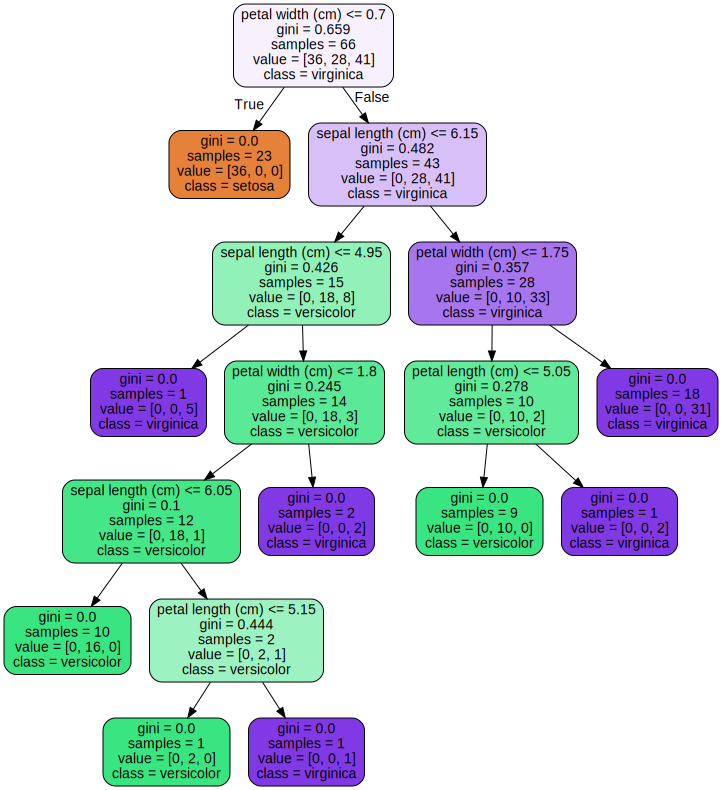

In [125]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [132]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')